In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import calendar
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
aisles = pd.read_csv('Dataset for InstaCart/aisles.csv')

In [3]:
aisles.head()

,aisle_id,aisle
0,1,prepared soups salads
1,2,specialty cheeses
2,3,energy granola bars
3,4,instant foods
4,5,marinades meat preparation


In [4]:
products = pd.read_csv('Dataset for InstaCart/products.csv')
products.head()

,product_id,product_name,aisle_id,department_id
0,1,Chocolate Sandwich Cookies,61,19
1,2,All-Seasons Salt,104,13
2,3,Robust Golden Unsweetened Oolong Tea,94,7
3,4,Smart Ones Classic Favorites Mini Rigatoni Wit...,38,1
4,5,Green Chile Anytime Sauce,5,13


In [6]:
product_mapping = products[['product_id','product_name']].set_index('product_id').to_dict()['product_name']
print(products.head(3))

   product_id                          product_name  aisle_id  department_id
0           1            Chocolate Sandwich Cookies        61             19
1           2                      All-Seasons Salt       104             13
2           3  Robust Golden Unsweetened Oolong Tea        94              7


In [7]:
department = pd.read_csv('Dataset for InstaCart/departments.csv')

In [8]:
print(department.head())

   department_id department
0              1     frozen
1              2      other
2              3     bakery
3              4    produce
4              5    alcohol


In [9]:
order_products = pd.read_csv('Dataset for InstaCart/order_products__prior.csv')
order_products.head(3)

,order_id,product_id,add_to_cart_order,reordered
0,2,33120,1,1
1,2,28985,2,1
2,2,9327,3,0


In [12]:
orders = pd.read_csv('Dataset for InstaCart/orders.csv')
orders.sample(3)

,order_id,user_id,eval_set,order_number,order_dow,order_hour_of_day,days_since_prior_order
2862855,427504,172733,prior,15,6,15,6.0
1659277,1288980,99623,prior,35,5,17,8.0
1967353,2354550,118148,prior,13,0,14,8.0


In [11]:
def clear_xtick(tick):
    t = int(tick)
    if t % 2 ==0:
        return ''
    else:
        return t

 Mean Number of products per order: 10


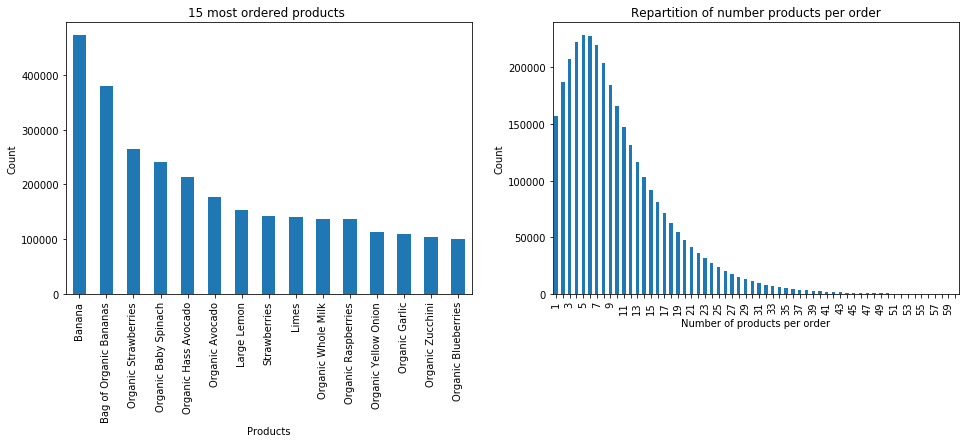

In [14]:
f,ax = plt.subplots(figsize=(16,5),ncols=2)
top_k = 15
order_products.product_id.value_counts()[:top_k].plot('bar',ax =ax[0])
_ = ax[0].set_title('%s most ordered products ' % top_k)
_ = ax[0].set_xlabel('Products')
_ = ax[0].set_ylabel('Count')
_ = ax[0].set_xticklabels([product_mapping[int(k.get_text())] for k in ax[0].get_xticklabels()])

prod_id_col = order_products.groupby('order_id').count()['product_id']
prod_id_col.value_counts().sort_index()[:60].plot('bar',ax=ax[1])
_ = ax[1].set_title('Repartition of number products per order')
_ = ax[1].set_xlabel('Number of products per order')
_ = ax[1].set_ylabel("Count")
_ = ax[1].set_xticklabels([clear_xtick(k.get_text()) for k in ax[1].get_xticklabels()])
print(' Mean Number of products per order: %d' % prod_id_col.mean())

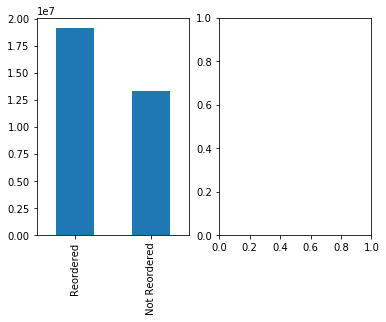

In [17]:
f, ax = plt.subplots(ncols=2)
_ = order_products.reordered.value_counts().plot('bar', ax =ax[0])
_ = ax[0].set_xticklabels([{0:'Not Reordered', 1: 'Reordered'}.get(int(k.get_text())) for k in ax[0].get_xticklabels()])

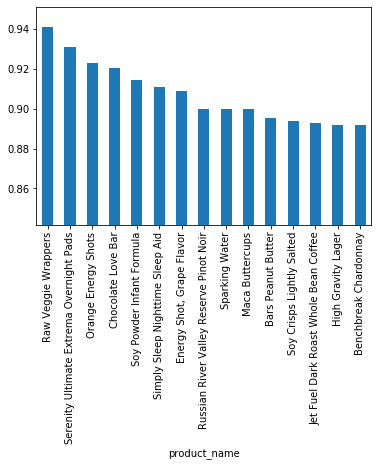

In [18]:
reord = order_products.groupby('product_id').agg({'order_id':'count','reordered':"mean"})
reord = pd.merge(reord, products, right_on = "product_id",left_index=True).sort_values('reordered',ascending=False)
reord[:15].set_index('product_name')['reordered'].plot('bar')
_ = plt.ylim([reord[:15].reordered.min() - 0.05, reord[:15].reordered.max()+0.01])

# Orders Distribution

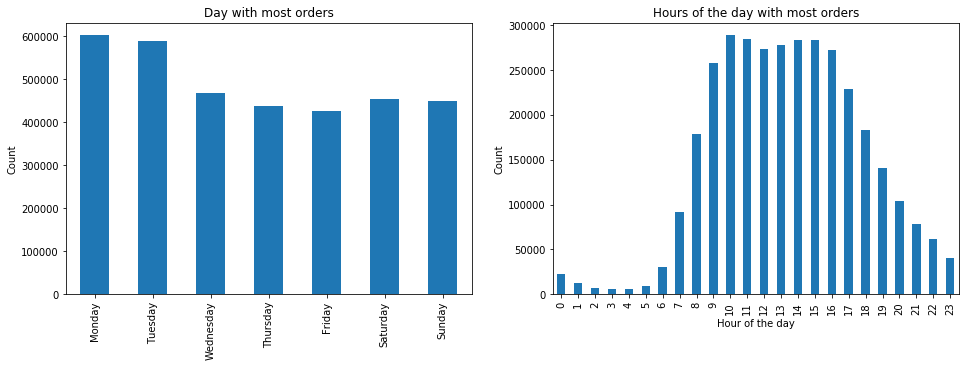

In [19]:
f, ax = plt.subplots(figsize=(16,5),ncols=2)
top_k = 15
orders.order_dow.value_counts().sort_index().plot('bar',ax=ax[0])
_ = ax[0].set_title('Day with most orders')
_ = ax[0].set_ylabel('Count')
_ = ax[0].set_xticklabels([calendar.day_name[int(k.get_text())]
                          for k in ax[0].get_xticklabels()])

orders.order_hour_of_day.value_counts().sort_index().plot('bar',ax=ax[1])
_ = ax[1].set_title("Hours of the day with most orders")
_ = ax[1].set_xlabel('Hour of the day')
_ = ax[1].set_ylabel('Count')

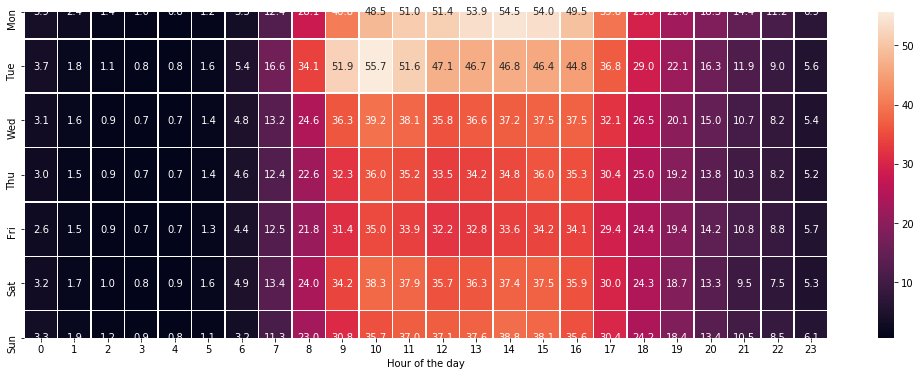

In [21]:
f, ax= plt.subplots(figsize=(18,6))
d = orders.pivot_table(index='order_dow',columns = 'order_hour_of_day',values=
                      'order_id',aggfunc=lambda x:round(len(x)*0.001,2)).fillna(0)
f = sns.heatmap(d,annot=True,fmt = '1.1f',linewidth=.5,ax=ax)
_ = ax.set_yticklabels([calendar.day_name[int(k.get_text())][:3] for k in ax.get_yticklabels()])
_ = ax.set_ylabel('')
_ = ax.set_xlabel('Hour of the day')

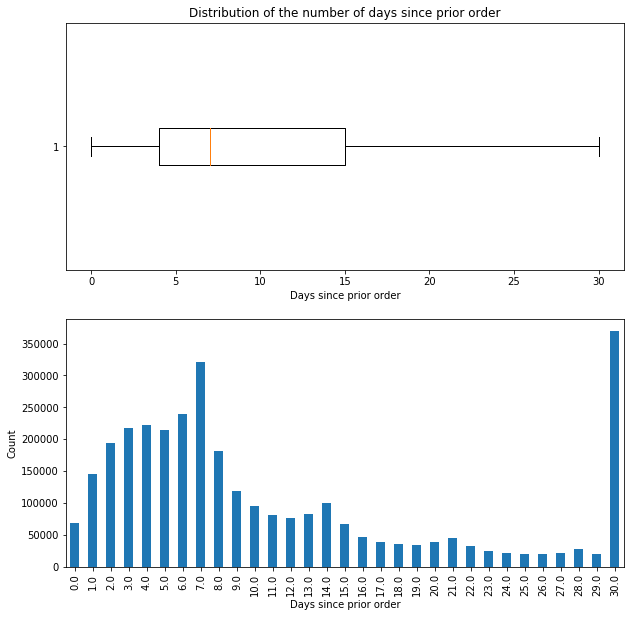

In [24]:
f, ax = plt.subplots(figsize=(10,10), nrows=2)
_ = ax[0].boxplot(list(orders.days_since_prior_order.dropna()), 0, 'rs', 0)
_ = ax[0].set_xlabel('Days since prior order')
_ = ax[0].set_title('Distribution of the number of days since prior order')

orders.days_since_prior_order.value_counts().sort_index().plot('bar', ax=ax[1])
_ = ax[1].set_xlabel('Days since prior order')
_ = ax[1].set_ylabel('Count')

In [1]:
from tqdm import tqdm

In [ ]:
from keras.models import Sequential

Using TensorFlow backend.


In [ ]:
import subprocess

In [ ]:
import csv

In [ ]:
from keras.layers import Dense
from keras import optimizers
from keras_tqdm import TQDMNotebookCallback
from kera